

### Youth Segment Analysis Report: Marketing Campaign Effectiveness

**Business Problem** : 

Bank meningkatkan penetrasi produk *tabungan berjangka* pada segmen nasabah muda. Namun, efektivitas kampanye pemasaran digital terhadap segmen ini belum sepenuhnya dipahami. 

**Pertanyaan bisnis utama:**
> _Apakah nasabah muda (youth clients) benar-benar tertarik dengan produk tabungan berjangka? Apa yang membedakan mereka dari nasabah lain dalam respons terhadap kampanye pemasaran?_

- - -


## Tech Stack

- **Python**, **Pandas**, **Seaborn**, **Matplotlib**
- Dataset: `client.csv`, `campaign.csv`

In [28]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load datasets
clients = pd.read_csv('./datasets/client.csv')
campaigns = pd.read_csv('./datasets/campaign.csv')

In [30]:
# Cek struktur data klien
print(f'Jumlah data: {clients.shape[0]} entri')
print(f'Jumlah kolom: {clients.shape[1]} kolom')
clients.head(2)

Jumlah data: 41188 entri
Jumlah kolom: 7 kolom


,client_id,age,job,marital,education,credit_default,mortgage
0,0,56,housemaid,married,basic_4y,False,False
1,1,57,services,married,high_school,False,False


**Goals :**

> Apakah nasabah muda tertarik dengan product tabungan berjangka ?

**Metriks Analisis :**
1. Nasabah Muda yang berumur dibawah 35 tahun
2. Tingkat Konversi
3. Korelasi dengan campaign

In [31]:
# Filter nasabah muda (usia < 35 tahun)
youth_clients = clients[clients['age'] < 35]
youth_clients_rate = youth_clients.shape[0]/ clients.shape[0] * 100

print(f"Jumlah nasabah muda : {youth_clients.shape[0]} nasabah")
print(f"persentase nasabah muda : {youth_clients_rate :.2f}% dari total client")

Jumlah nasabah muda : 14754 nasabah
persentase nasabah muda : 35.82% dari total client


In [32]:
# Gabungkan data klien muda dengan kampanye
youth_campaigns = pd.merge(youth_clients, campaigns, on='client_id', how='inner')
print(f"Jumlah kampanye untuk nasabah muda : {youth_campaigns.shape[0]} kampanye")

Jumlah kampanye untuk nasabah muda : 14754 kampanye


**Cek Korelasi :** 
Cek korelasi antar fitur dari outcome_campaigns

In [33]:
# Hitung conversion rate kampanye untuk nasabah muda
conversion_rate = youth_campaigns['campaign_outcome'].mean()
print(f"Conversion rate kampanye untuk nasabah muda: {conversion_rate:.2%}")

Conversion rate kampanye untuk nasabah muda: 13.03%


C:\Users\62857\AppData\Local\Temp\ipykernel_11896\841588854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=youth_campaigns, x='campaign_outcome', palette='pastel')


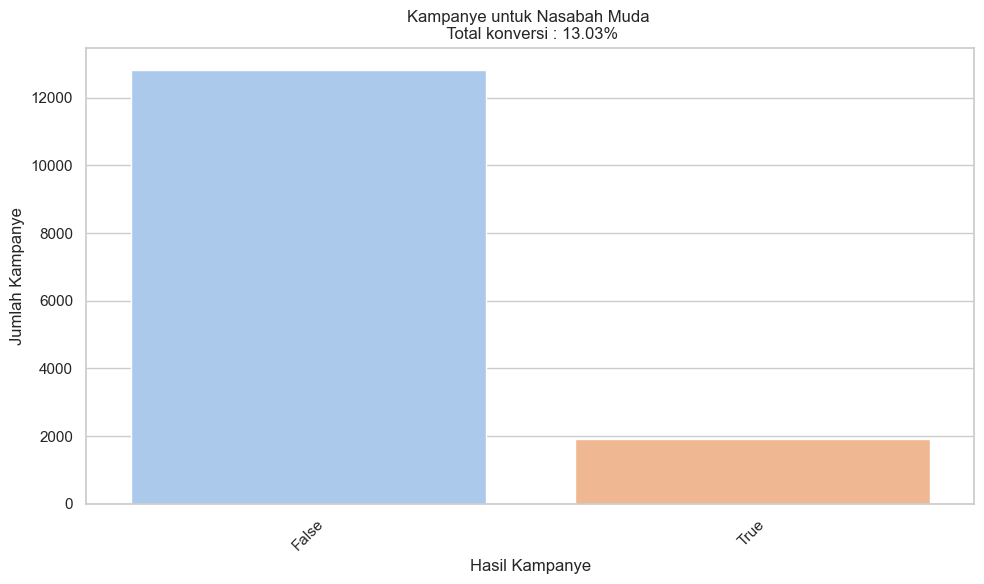

In [34]:
# Visualisasi konversi kampanye
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=youth_campaigns, x='campaign_outcome', palette='pastel')
plt.title(f'Kampanye untuk Nasabah Muda \n Total konversi : {conversion_rate:.2%}')    
plt.xlabel('Hasil Kampanye')
plt.ylabel('Jumlah Kampanye')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./visual/kampanye_untuk_nasabah_muda.png')
plt.show()

# Insight : 
1. 13.03% Nasabah muda tertarik karena kampanye kita
2. Next : Reason and correlation about this campaign 

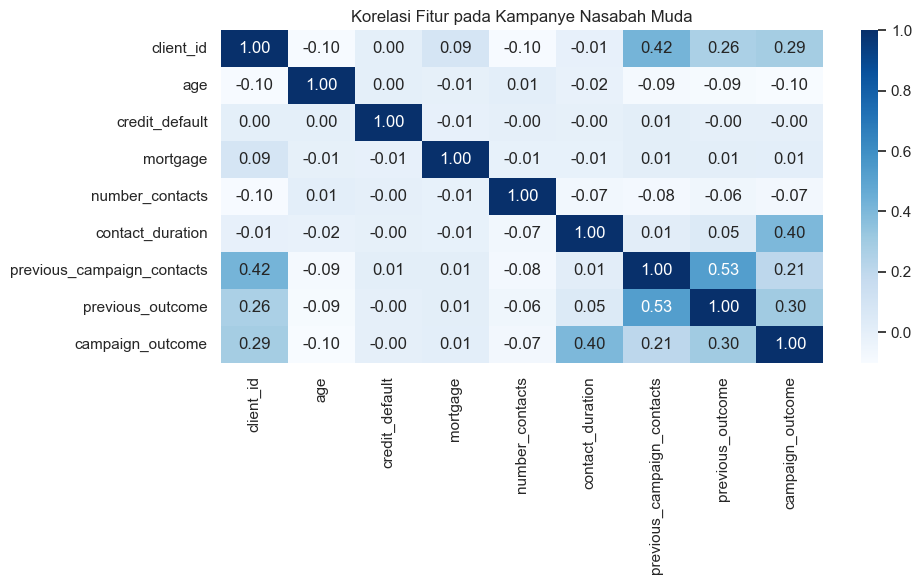

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(youth_campaigns.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Korelasi Fitur pada Kampanye Nasabah Muda')
plt.savefig('./visual/korelasi_fitur_kampanye_nasabah_muda.png')
plt.tight_layout()
plt.show()

# Correlation : 
1. Top 3 Field Correlation : Contact_duration, previous_outcome, previous_campaign_contact
2. Focusing on what we can improve and developing to making better decision strategic

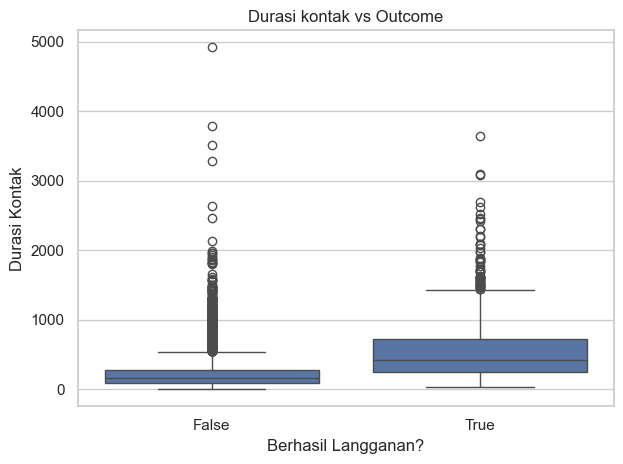

In [ ]:
sns.boxplot(data=youth_campaigns, x='campaign_outcome', y='contact_duration')
plt.title('Durasi kontak vs Outcome')
plt.xlabel('Berhasil Langganan?')
plt.ylabel('Durasi Kontak')

plt.savefig('./visual/durasi_kontak_vs_outcome.png')
plt.tight_layout()
plt.show()


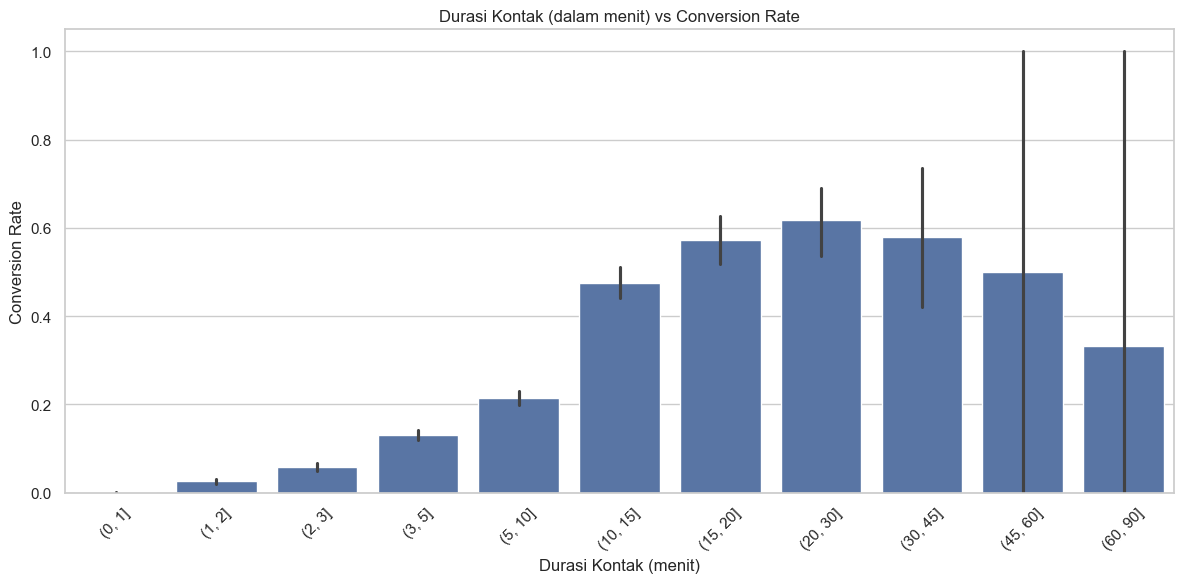

In [ ]:
# Visualisasi campaign outcome berdasarkan bin durasi
plt.figure(figsize=(12, 6))
sns.barplot(data=youth_campaigns, x='duration_bin', y='campaign_outcome')
plt.title('Durasi Kontak (dalam menit) vs Conversion Rate')
plt.xticks(rotation=45)
plt.xlabel('Durasi Kontak (menit)')
plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.savefig('./visual/durasi_kontak_vs_conversion_rate.png')
plt.show()

# Insight & Strat :
1. Get increase 2 times bigger on 10 - 15 min
2. Flat in 30 min

**Strat :**
1. Evaluating and more focus our contact duration to be 10 - 30 min
2. for best practice in 15 - 35 min

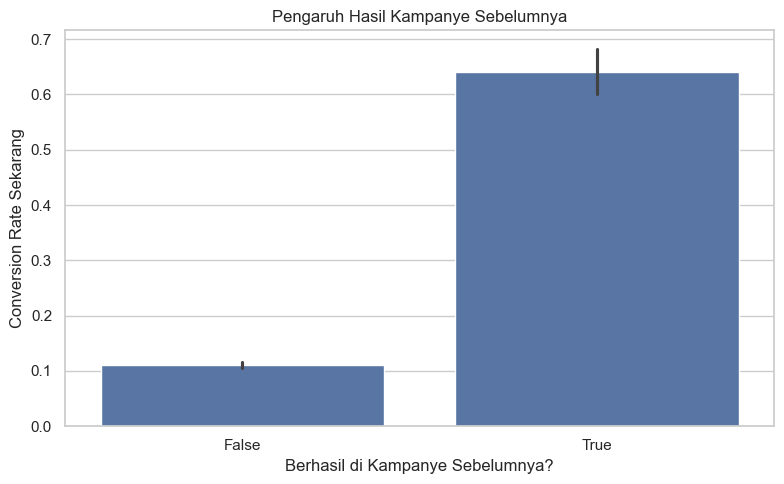

In [ ]:
# Apakah campaign sebelumnya mempengaruhi hasil saat ini?
plt.figure(figsize=(8, 5))
sns.barplot(data=youth_campaigns, x='previous_outcome', y='campaign_outcome')
plt.title('Pengaruh Hasil Kampanye Sebelumnya')
plt.xlabel('Berhasil di Kampanye Sebelumnya?')
plt.ylabel('Conversion Rate Sekarang')
plt.savefig('./visual/pengaruh_hasil_kampanye_sebelumnya.png')
plt.tight_layout()
plt.show()

In [ ]:
# Buat bin durasi kontak (dalam menit)
bins = [0, 1, 2, 3, 5, 10, 15, 20, 30, 45, 60, 90]
youth_campaigns['duration_bin'] = pd.cut((youth_campaigns['contact_duration'] / 60), bins)

C:\Users\62857\AppData\Local\Temp\ipykernel_11896\3676604989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=youth_campaigns, x='job', y='campaign_outcome', palette='coolwarm')


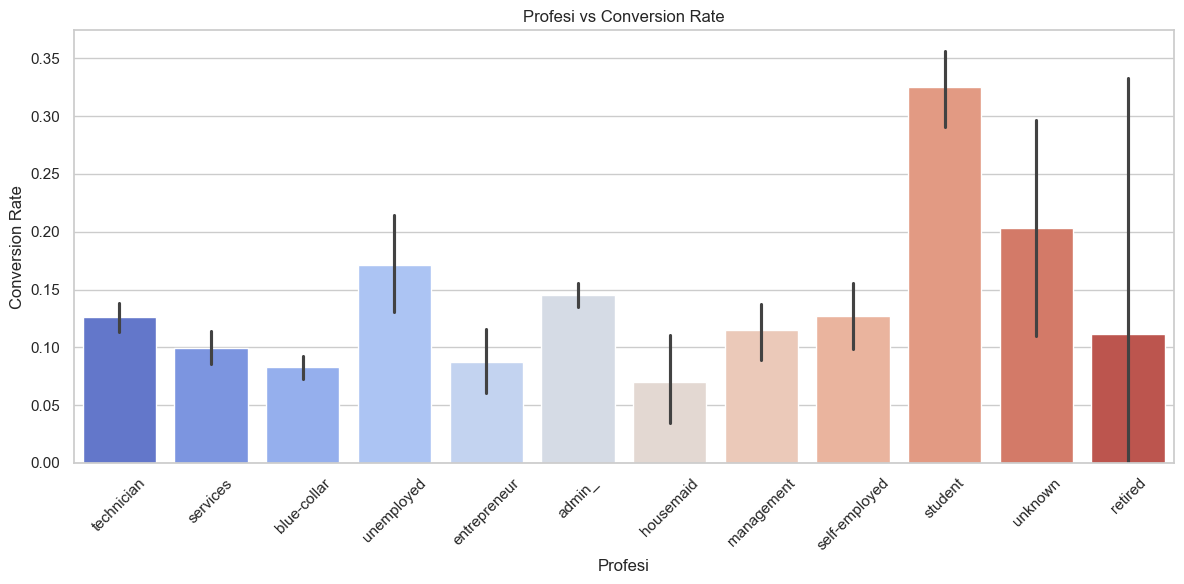

In [ ]:
# Visualisasi pengaruh pekerjaan terhadap hasil kampanye
plt.figure(figsize=(12, 6))
sns.barplot(data=youth_campaigns, x='job', y='campaign_outcome', palette='coolwarm')
plt.title('Profesi vs Conversion Rate')
plt.xticks(rotation=45)
plt.xlabel('Profesi')
plt.ylabel('Conversion Rate')
plt.tight_layout()

plt.savefig('./visual/profesi_vs_conversion_rate.png')
plt.show()

In [ ]:
# Segmentasi usia untuk keperluan eksplorasi lebih lanjut
def segment_usia(age):
    if age < 30:
        return 'Muda (<30)'
    elif age <= 55:
        return 'Dewasa (30-55)'
    else:
        return 'Senior (>55)'

clients['age_segment'] = clients['age'].apply(segment_usia)

In [ ]:
# menggabungkan ulang seluruh dataset dengan segmentasi
df_campaign = pd.merge(clients, campaigns, on='client_id', how='inner')

In [ ]:
# Buat kombinasi segmentasi usia dan pekerjaan
df_campaign['segment'] = df_campaign['age_segment'] + ' | ' + df_campaign['job']

In [ ]:
# Hitung conversion rate per segmen
segment_performance = df_campaign.groupby('segment')['campaign_outcome'].mean().sort_values(ascending=False).reset_index()


C:\Users\62857\AppData\Local\Temp\ipykernel_11896\3947174730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_performance, x='segment', y='campaign_outcome', palette='viridis')


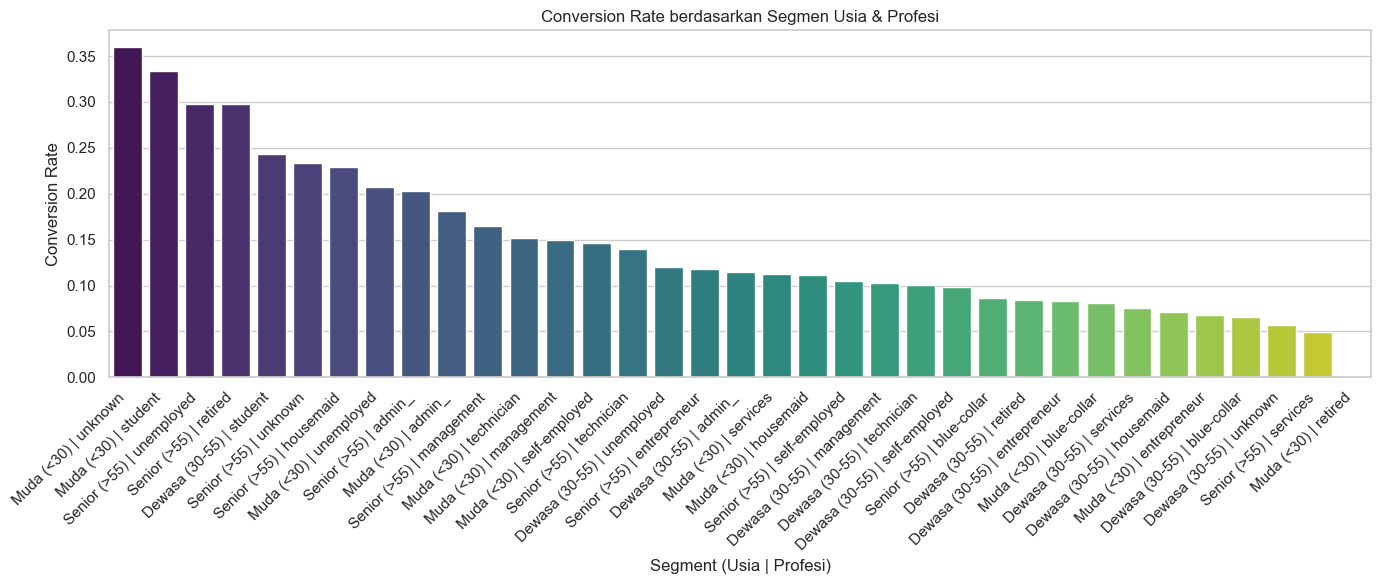

In [ ]:
# Visualisasikan segmen dengan conversion rate tertinggi
plt.figure(figsize=(14, 6))
sns.barplot(data=segment_performance, x='segment', y='campaign_outcome', palette='viridis')
plt.title('Conversion Rate berdasarkan Segmen Usia & Profesi')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Segment (Usia | Profesi)')
plt.ylabel('Conversion Rate')
plt.tight_layout()

plt.savefig('./visual/conversion_rate_per_segment.png')
plt.show()

# Focus Target Marketing : 
1. Student Muda
2. No official jobs senior
3. Student Dewasa
4. Muda Unemployed 

**Less Focus :** For saving budgets
1. Muda Retired
2. Senior Services
3. Muda Enterpreuner